In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [52]:
df=pd.read_csv('hearing_test.csv')
print (len(df))
df.head()

5000


,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


<Axes: xlabel='age'>

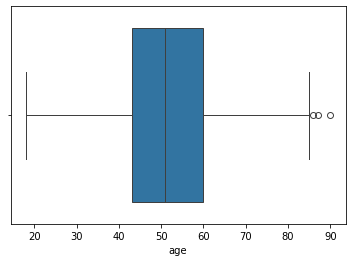

In [90]:
sns.boxplot(data=df,x='age')

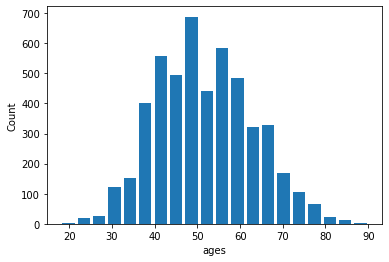

In [20]:
plt.hist(df.age, bins=20, rwidth=0.8)
plt.xlabel('ages')
plt.ylabel('Count')
plt.show()

## iqr 

In [15]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
print('Q1, Q3')
print(Q1, Q3)
IQR = Q3 - Q1
print('\nIQR')
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('\nlower_limit, upper_limit')
print(lower_limit, upper_limit)

Q1, Q3
43.0 60.0

IQR
17.0

lower_limit, upper_limit
17.5 85.5


In [16]:
df[(df.age<lower_limit)|(df.age>upper_limit)]

,age,physical_score,test_result
3881,90.0,12.7,0
4131,87.0,12.2,0
4928,86.0,21.7,0


## z score

In [23]:
upper_limit = df.age.mean() + 3*df.age.std()
lower_limit = df.age.mean() -3*df.age.std()
print('lower_limit,upper_limit')
print(lower_limit,upper_limit)

lower_limit,upper_limit
17.74799610884361 85.4700038911564


In [25]:
df[(df.age>upper_limit) | (df.age<lower_limit)]

,age,physical_score,test_result
3881,90.0,12.7,0
4131,87.0,12.2,0
4928,86.0,21.7,0


## percentile

In [43]:
min_thresold, max_thresold = df.age.quantile([0.001, 0.999])
min_thresold, max_thresold

(22.0, 84.0)

In [44]:
df[(df.age>max_thresold) | (df.age<min_thresold)]

,age,physical_score,test_result
594,18.0,48.2,1
1187,21.0,46.5,1
3196,21.0,46.3,1
3881,90.0,12.7,0
4131,87.0,12.2,0
4683,85.0,24.9,0
4928,86.0,21.7,0


## IsolationForest

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Nilai unik: [-1  1]
Jumlah masing-masing nilai: [   4 4996]


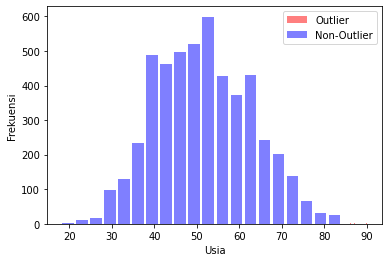

In [73]:

import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('hearing_test.csv')

# Menggunakan Isolation Forest untuk mendeteksi outlier pada fitur 'age'
clf = IsolationForest(contamination=0.001)  # misalnya, 5% dari data dianggap sebagai outlier
outliers = clf.fit_predict(df[['age']])


unique_values, counts = np.unique(outliers, return_counts=True)
print("Nilai unik:", unique_values)
print("Jumlah masing-masing nilai:", counts)


df['outlier'] = outliers
# Visualisasi histogram dengan menandai outlier
plt.hist(df[df['outlier'] == -1]['age'], bins=20, rwidth=0.8, color='red', alpha=0.5, label='Outlier')
plt.hist(df[df['outlier'] == 1]['age'], bins=20, rwidth=0.8, color='blue', alpha=0.5, label='Non-Outlier')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [74]:
cari=-1
print(len (df),len(df[df['outlier']==cari]))
df[df['outlier']==cari]

5000 4


,age,physical_score,test_result,outlier
3881,90.0,12.7,0,-1
4131,87.0,12.2,0,-1
4683,85.0,24.9,0,-1
4928,86.0,21.7,0,-1


## LocalOutlierFactor

Nilai unik: [-1  1]
Jumlah masing-masing nilai: [   3 4997]


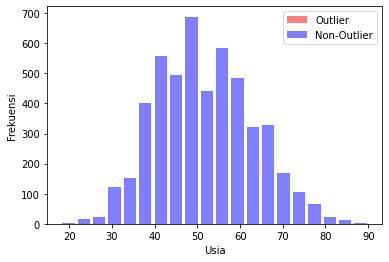

In [86]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('hearing_test.csv')

# Menginisialisasi model Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.001)  # misalnya, 5% dari data dianggap sebagai outlier

# Melakukan prediksi outlier menggunakan model LOF
outliers = lof.fit_predict(df[['age']])

unique_values, counts = np.unique(outliers, return_counts=True)
print("Nilai unik:", unique_values)
print("Jumlah masing-masing nilai:", counts)


# Menambahkan kolom 'outlier' ke dalam DataFrame
df['outlier'] = outliers

# Visualisasi histogram dengan menandai outlier
plt.hist(df[df['outlier'] == -1]['age'], bins=20, rwidth=0.8, color='red', alpha=0.5, label='Outlier')
plt.hist(df[df['outlier'] == 1]['age'], bins=20, rwidth=0.8, color='blue', alpha=0.5, label='Non-Outlier')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()


In [87]:
cari=-1
print(len (df),len(df[df['outlier']==cari]))
df[df['outlier']==cari]

5000 3


,age,physical_score,test_result,outlier
846,26.0,41.7,1,-1
1005,26.0,43.2,1,-1
4444,23.0,44.2,1,-1
